# Assignment 1: K-Nearest Neighbor (10 marks)

Student Name:

Student ID:

## General info

<b>Due date</b>: Friday, 12 August 2022 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:hasti.samadi@unimelb.edu.au">Hasti Samadi</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 10, and make up 10% of your overall mark for this subject.

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/126693/pages/python-and-jupyter-notebooks?module_item_id=3950453) on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer.If your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (Piazza -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: While you may discuss this homework in general terms with other students, it ultimately is still an individual task. Reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/126693/modules#module_734188">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>

## Overview

In this homework, you'll be applying the K-nearest neighbor (KNN) classification algorithm to a real-world machine learning data set. In particular, we will predict the affordability of a car given a diverse set of features, including the make, engine type, style,  and horsepower and other descriptive properties of the car.

Firstly, you will read in the dataset into a train and a test set, and you will create two feature sets (Q1). Secondly, you will implement different distance functions (Q2). Thirdly, you will implement one KNN classifier (Q3, Q4) and apply it to the data set using different distance functions and parameter K (Q5). Finally, you will assess the quality of your classifier by comparing its class predictions to the gold standard labels (Q6).




# Question 1: Loading the data (0.5 marks)

**Instructions:** For this assignment we will develop a K-Nearest Neighbors (KNN) classifier to predict the 
affordability of cars. The list of classes is:

```
cheap
affordable
expensive
very expensive
```

We use a modified version of the Car data set from the UCI Machine learning repository.

The original data can be found here: https://archive.ics.uci.edu/ml/datasets/Automobile

The dataset consists of 204 instances. Each instance corresponds to a car which has a unique identifier (X; first field) and is characterized with 24 features as described in the file *car.names* which is provided as part of this assignment.

You need to first obtain this dataset, which is on Canvas (assignment 1). The files *car.features* and *car.labels* contain the data we will use in this notebook. Make sure the files are saved in the same folder as this notebook. 

Both files are in comma-separated value format. The first line in each file is a header, naming each feature (or label).

*car.features* contains 204 instances, one line per instance. The first field is the unique instance identifier. The following fields contain the 24 features, as described in the file *car.names*.

*car.labels* contains the gold labels (i.e., one of the four classes above), one instance per line. Again, the first field is the instance identifier, and the second field the instance label.

*car.names* contains additional explanations about the data set and the features.

All feature values are floats, and for Questions 1 through 5, we make the simplifying assumption that all values are indeed real-valued. You may want to revisit this assumption in Question 6.



**Task**: Read the two files  
1. create a **training_feature** set (list of features for the first 163 instances in the car.* files) and a **training_label** set (list of labels for the corresponding). 
2. create a **test_feature** set (list of features of the remaining instances in the car.* files) and a **test_label** set (list of labels for the corresponding). 
---------
- Do **not** shuffle the data.
- Do **not** modify feature or label representations. 
- Features must be represented as floats.
--------
You may use any Python packages you want, but not change the specified data types (i.e., they should be of type List, and *not* dataframe, dictionary etc).

In [101]:
data_f = open("car.features", 'r').readlines()
data_l = open("car.labels", 'r').readlines()

train_features = []
train_labels   = []
test_features = []
test_labels   = []


###########################
## YOUR CODE BEGINS HERE
###########################

# Get rid of header
features = data_f[1:]
labels = data_l[1:]

for index in range(len(features)):
    feature = features[index].strip().split(",")
    label  = labels[index].strip().split(",")
    # convert from string list to numeric list
    feature[0] = int(feature[0])
    feature[1:]= list(map(lambda x: float(x), feature[1:]))

    if index < 163:
        train_features.append(feature)
        train_labels.append(label[1])
    else:
        test_features.append(feature)
        test_labels.append(label[1])
    index += 1


###########################
## YOUR CODE ENDS HERE
###########################

print("number of train/test instances:",len(train_features), len(test_features))
print("number of train/test features:",len(train_features[40]), len(test_features[1]))


number of train/test instances: 163 41
number of train/test features: 25 25


### Question 2: Distance Functions [1.5 marks]

<b>Instructions</b>: Implement the three distance functions specified below. 

1. Euclidean distance
2. Cosine distance
3. Chebyshev distance, defined as:
    
    $d(x,y)=\max_{i}|x_i-y_i|$
    

Each distance function takes as input
- Two feature vectors (each of type List)

and returns as output
- The distance between the two feature vectors (float)

------------

Use <b>only</b> the library imported below, i.e., <b>do not</b> use implementations from any other Python library. 

In [102]:
import math


def euclidean_distance(fw1, fw2):
    # insert code here
    distance = math.sqrt(sum(map(lambda x, y: (x-y)**2, fw1, fw2)))
    # same result by using math.dist(fw1,fw2)
    
    return distance




def cosine_distance(fw1, fw2):
    # insert code here

    def dot(fw1,fw2):
        result = sum(map(lambda x,y: x*y, fw1, fw2))
        return result
    
    def norm(fw1):
        result = math.sqrt(sum(map(lambda x: x**2, fw1)))
        return result

    distance = 1- dot(fw1,fw2) / (norm(fw1)*norm(fw2))
    return distance


def chebyshev_distance(fw1, fw2):
    # insert code here
    
    distance = max(map(lambda x,y: x-y, fw1, fw2))

    return distance




###########################
## YOUR CODE ENDS HERE
###########################

print(round(euclidean_distance(train_features[100],test_features[2]), 5))
print(round(chebyshev_distance(train_features[100],test_features[2]), 5))
print(round(cosine_distance(train_features[100],test_features[2]), 5))



603.68527
600.0
0.00014


### Question 3: KNN Classifier [2.0 marks]

<b>Instructions</b>: Here, you implement your KNN classifier. It takes as input 
- training data features
- training data labels
- test data features
- parameter K
- distance function(s) based on which nearest neighbors will be identified

It returns as output 
- the predicted labels for the test data

**Ties among distances**. If there are more than K instances with the same (smallest) distance value, consider the first K. For example, for K=1 if you have 3 instances (with identifiers i = 3, 12, 54) that all have the same distance to your test instance (e.g., 0.641), the instance with the smallest identifier should be selected as the nearest neighbor (in this case i = 3).

**Ties at prediction time.** Ties can also occur at class prediction time when two (or more) classes are supported by the same number of neighbors. In that case choose the class of the 1 nearest neighbor. The "1 nearest neighbor" refers only to those classes represented with the maximum support in the neighborhood. E.g., for K = 5, with a neighborhood ordered by distance: {'cheap', 'expensive', 'affordable', expensive', 'affordable'} you would choose the 1 nearest neighbor among {'expensive','affordable'}.

-----------

**You should implement the classifier from scratch yourself**, i.e., <b> you must not</b> use an existing implementation in any Python library. You may use Python packages (e.g., math, numpy, collections, ...) to help with your implementation.

In [103]:
from collections import Counter

def KNN(train_features, train_labels, test_features, k, dist_fun, weighted=False):
    
    predictions = []
    
    ###########################
    ## Your answer BEGINS HERE
    ###########################
    
    
    
    for test_feature in test_features:
        
        # Calculate distances
        Dist_label = []
        for train_feature in train_features:
            dist = dist_fun(train_feature, test_feature)
            label = train_labels[train_feature[0]]
            Dist_label.append([dist,label ])
        
        """ 
        Automatically break ties since instances with smaller identifier are always calculated first.
        """
        Knn = sorted(Dist_label, key = lambda x: x[0])[:k]
        
        if weighted:
            eps = 0.000001
            w_Knn = {}
            for neighboor in Knn:
                weight =  1/(neighboor[0]+eps)
                label = neighboor[1]
                w_Knn[label] = w_Knn.get(label,0.0)+weight
            
            prediction =max(w_Knn,key = w_Knn.get)
            
        
        else:
            Knn_lables = [neighboor[1] for neighboor in Knn]
            prediction = Counter(Knn_lables).most_common()[0][0]
        
        predictions.append(prediction)

        
    ###########################
    ## Your answer ENDS HERE
    ###########################
    
    return predictions


### Question 4: Weighted KNN Classifier [1.0 mark]

<b>Instructions</b>: Extend your implementation of the KNN classifier in Question 3 to a Weighted KNN classifier. You should change the code in the cell above. Use Inverse Distance as weights:

$w_j=\frac{1}{d_j+\epsilon}$

where

- $d_j$ is the distance of of the jth nearest neighbor to the test instance
- $\epsilon=0.000001$

Use the Boolean parameter `weighted` to specify the KNN version when calling the function.

### Question 5: Applying your KNN classifiers to the Car Dataset [0.5 marks]

**Using the functions you have implemented above, please**

<b> 1. </b>
For each of the distance functions you implemented in Question 2, construct (a) Nine majority voting KNN classifiers and (b) Nine weighted KNN classifiers, respectively, with 

- K=1
- K=5
- k=20

You will obtain a total of 18 (3 distance functions x 3 K values x 2 KNN versions) classifiers.

<b> 2. </b>
Compute the test accuracy for each model, where the accuracy is the fraction of correctly predicted labels over all predictions. Use the `accuracy_score` function from the `sklearn.metrics` package to obtain your accuracy.


In [104]:
from sklearn.metrics import accuracy_score

########################
# Your code STARTS HERE
########################




knn_euc_1_pre= KNN(train_features, train_labels, test_features, 1, euclidean_distance, weighted=False)
knn_euc_5_pre = KNN(train_features, train_labels, test_features, 5, euclidean_distance, weighted=False)
knn_euc_20_pre =KNN(train_features, train_labels, test_features, 20, euclidean_distance, weighted=False)

knn_euc_1_w_pre = KNN(train_features, train_labels, test_features, 1, euclidean_distance, weighted=True)
knn_euc_5_w_pre = KNN(train_features, train_labels, test_features, 5, euclidean_distance, weighted=True)
knn_euc_20_w_pre = KNN(train_features, train_labels, test_features, 20, euclidean_distance, weighted=True)


knn_cos_1_pre = KNN(train_features, train_labels, test_features, 1, cosine_distance, weighted=False)
knn_cos_5_pre = KNN(train_features, train_labels, test_features, 5, cosine_distance, weighted=False)
knn_cos_20_pre = KNN(train_features, train_labels, test_features, 20, cosine_distance, weighted=False)

knn_cos_1_w_pre = KNN(train_features, train_labels, test_features, 1, cosine_distance, weighted=True)
knn_cos_5_w_pre = KNN(train_features, train_labels, test_features, 5, cosine_distance, weighted=True)
knn_cos_20_w_pre = KNN(train_features, train_labels, test_features, 20, cosine_distance, weighted=True)

knn_che_1_pre = KNN(train_features, train_labels, test_features, 1, chebyshev_distance, weighted=False)
knn_che_5_pre = KNN(train_features, train_labels, test_features, 5, chebyshev_distance, weighted=False)
knn_che_20_pre = KNN(train_features, train_labels, test_features, 20, chebyshev_distance, weighted=False)

knn_che_1_w_pre = KNN(train_features, train_labels, test_features, 1, chebyshev_distance, weighted=True)
knn_che_5_w_pre = KNN(train_features, train_labels, test_features, 5, chebyshev_distance, weighted=True)
knn_che_20_w_pre = KNN(train_features, train_labels, test_features, 20, chebyshev_distance, weighted=True)




accuracy_knn_euc_1 = accuracy_score(knn_euc_1_pre,test_labels)
accuracy_knn_euc_5 = accuracy_score(knn_euc_5_pre,test_labels)
accuracy_knn_euc_20 = accuracy_score(knn_euc_20_pre,test_labels)
 
accuracy_knn_euc_1_w = accuracy_score(knn_euc_1_w_pre,test_labels)
accuracy_knn_euc_5_w = accuracy_score(knn_euc_5_w_pre,test_labels)
accuracy_knn_euc_20_w = accuracy_score(knn_euc_20_w_pre,test_labels)

accuracy_knn_cos_1 = accuracy_score(knn_cos_1_pre,test_labels)
accuracy_knn_cos_5 =  accuracy_score(knn_cos_5_pre,test_labels)
accuracy_knn_cos_20 = accuracy_score(knn_cos_20_pre,test_labels)

accuracy_knn_cos_1_w = accuracy_score(knn_cos_1_w_pre,test_labels)
accuracy_knn_cos_5_w =  accuracy_score(knn_cos_5_w_pre,test_labels)
accuracy_knn_cos_20_w = accuracy_score(knn_cos_20_w_pre,test_labels)

accuracy_knn_che_1 = accuracy_score(knn_che_1_pre,test_labels)
accuracy_knn_che_5 = accuracy_score(knn_che_5_pre,test_labels)
accuracy_knn_che_20 = accuracy_score(knn_che_20_pre,test_labels)
 
accuracy_knn_che_1_w = accuracy_score(knn_che_1_w_pre,test_labels)
accuracy_knn_che_5_w = accuracy_score(knn_che_5_w_pre,test_labels)
accuracy_knn_che_20_w = accuracy_score(knn_che_20_w_pre,test_labels)

########################
# Your code ENDS HERE
########################



print("Results on the *full* feature set")

print("\neuclidean (majority vote)")
print("K=1", round(accuracy_knn_euc_1, 3))
print("K=5", round(accuracy_knn_euc_5, 3))
print("K=20", round(accuracy_knn_euc_20, 3))

print("-----------\neuclidean (weighted)")
print("K=1", round(accuracy_knn_euc_1_w, 3))
print("K=5", round(accuracy_knn_euc_5_w, 3))
print("K=20", round(accuracy_knn_euc_20_w, 3))

print("\ncosine (majority vote)")
print("K=1", round(accuracy_knn_cos_1, 3))
print("K=5", round(accuracy_knn_cos_5, 3))
print("K=20", round(accuracy_knn_cos_20, 3))

print("-----------\ncosine (weighted)")
print("K=1", round(accuracy_knn_cos_1_w, 3))
print("K=5", round(accuracy_knn_cos_5_w, 3))
print("K=20", round(accuracy_knn_cos_20_w, 3))

print("\nchebyshev (majority vote)")
print("K=1", round(accuracy_knn_che_1, 3))
print("K=5", round(accuracy_knn_che_5, 3))
print("K=20", round(accuracy_knn_che_20, 3))

print("-----------\nchebyshev (weighted)")
print("K=1", round(accuracy_knn_che_1_w, 3))
print("K=5", round(accuracy_knn_che_5_w, 3))
print("K=20", round(accuracy_knn_che_20_w, 3))




Results on the *full* feature set

euclidean (majority vote)
K=1 0.366
K=5 0.512
K=20 0.512
-----------
euclidean (weighted)
K=1 0.366
K=5 0.488
K=20 0.561

cosine (majority vote)
K=1 0.512
K=5 0.585
K=20 0.659
-----------
cosine (weighted)
K=1 0.512
K=5 0.585
K=20 0.683

chebyshev (majority vote)
K=1 0.756
K=5 0.659
K=20 0.707
-----------
chebyshev (weighted)
K=1 0.756
K=5 0.707
K=20 0.707


### Question 6: Analysis [4.5 marks]

1. Consider the following features: make, fuel-type, body-style, and num-of-doors. Assume we intend to use KNN with euclidean distance, for each of the above features, would you change the approach we chose to convert nominal to numeric features? If yes, explain what approach you would select and discuss one benefit and one drawback of your proposed approach.**[0.75 marks]** 

    
2. Consider these two sets of attributes: (curb-weight,engine-size) and (compression-ratio, peak-rpm)

    (a) For each set of features, create a scatter plot of data points coloring instances from each class differently. You should produce **two plots** which show the scattered data points colored by class label. Label the x-axis and y-axis. [*N.B. you may use libraries like <a href="https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py">matplotlib</a> or <a href="https://seaborn.pydata.org/introduction.html">seaborne</a>*] **[1 mark]**
    
    (b) Which feature set is more informative in the context of this classification task and why?**[0.5 marks]**
    
    (c) What do you observe about the relationship between features in each feature set and how did you come to that conclusion?**[0.25 marks]**
    
    
3. Discuss the appropriateness of each of the distance functions for our *car* data set. Where appropriate, explain why you expect them to perform poorly referring to both their mathematical properties and the given feature set. **[0.75 marks]**

    

4. Does the Weighted KNN outperform the Majority voting version, or vice versa? Hypothesize why (not). **[0.75 mark]**



5. Do you think the accuracy is an appropriate evaluation metric for the *car* data set? Why (not)? **[0.5 marks]**

 

<b>Each question should be answered in no more than 3-4 sentences.</b>






1. Yes, I will change the approach to convert nominal to numeric features. What we do now is just mapping category names to numbers, which creates an artificial ordering. When calculating euclidean distance, some categories will appear more "close" to each other than others. I may choose "One-hot encoding" since it doesn't have the discussed problem. All categories are equally different. However, it expands the dimention of the data set and causes difficulties to directly calculate the euclidean distance.  

2

*Type code for 2.(a) in the cell below, and answer 2.(b) and 2.(c) below*

2b) The set curb-weight vs engine-size is more informative since it shows a more clear pattern in the plot and each class of price is allocated in a certain range, while data points for each price are mixed up in the set compression-ratio vs peak-rpm. Moreover, a few data points in the second set are out of the main range, which may be recognized as outliers.

2c) For set curb-weight vs engine-size, by grouping colors, it is obvious that cars labelled as cheap are more likely to have small weight (0 - 0.4) and samll engine-size (0 - 0.4), cars labelled as affordable and expensive have higher curb weight (0.4 - 0.8) and engine size (0.2 - 0.5), however, expensize cars have a potential trend to have higher curb weight and engine size than affordable cars, and cars labelled as very expensize have highest curb weight (0.8 - 1) and engine size (0.6 - 1). Therefore, it can be concluded as the more expensive the car, the bigger the curb weight and engine size.

For set compression ratio and peak rpm, it doesn't have a very clear pattern even to exclude outliers. The only informative thing is that the most compression ratio for all cars are in range between 6 to 10 and most peak rpm are in range 4000 to 6000.

3 The accuracy for Euclidean distance is very low. It measures the space distance among instances and assume more similar more closed. However, the set has already created an artificial ordering for nominal data. Therefore, the given feature set is somehow "biased" for this method and misleads the result.

The accuracy of Cosine distance is around 0.6, which is better than the Euclidean distance but still not very good. This method basically calculats and compares the "angle" of the instances and ignoring the "length" difference. Thinking of our feature set, the "length" still needs to be considered. Furthermore, this method is also affected by the artificial created differences. So that this method doesn't make much sense.

The Chebyshev distance method performs best, which impressed me. It just considers the furthest distance of one feature as the similarity and ignores all the remaining data. In general, it should not perform very well, because instances with same max distance but of different feature are recognized as the same, which should not be. However, in some cases where a dominant distinct feature exists, it may perform well. Perhaps this feature set is one example.


4 Comparing accuracies, it doesn't show a significant improvement using Weighted Knn. One possible reason is that the weighted Knn is only helpful when k nearest neighbours are of different classes but the number of each class is very similar. Therefore, if the nearest neighbours is consistent, this will make no difference. Another reasonable reason is that the epsilon we used is too small which will finally weight the "closed" data too much and then dominant the others.

5 No, it's not a appropriate evaluation metric for this data set. Generally, this data set is to predict the price of a car. Price is a feature that can be represented in continuous number. Therefore, instead of classify the category of price, it is better to predict the exact price using regression and evaluate the result by comparing the "distance" of the error. 


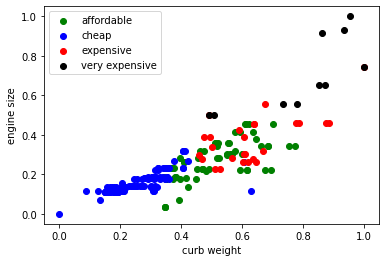

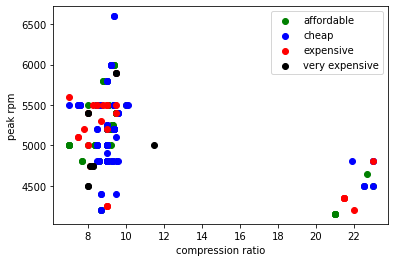

In [150]:
import matplotlib.pyplot as plt
import pandas as pd


################################################
# Your answer to Question 6 (2) STARTS HERE
################################################

features = train_features+test_features
labels = train_labels+test_labels
header_f = data_f[0].strip().split(",")
header_l = data_l[0].strip().split(",")

data_features = pd.DataFrame(features, columns=header_f)
data_labels = pd.DataFrame(labels, columns=["price"])

data = pd.concat([data_features, data_labels], axis=1).groupby("price")


data_cheap=[]
data_afford=[]
data_exp =[]
data_ver_exp=[]
dict_color = {'cheap':'b', 'affordable':'g', 'expensive':'r', 'very expensive':'k'}

for name, group in data:
    plt.figure(0)
    plt.scatter(group['curb-weight'], group['engine-size'], color = dict_color[name], label=name)
    plt.xlabel("curb weight")
    plt.ylabel("engine size")
    plt.legend()

    plt.figure(1)
    plt.scatter(group['compression-ratio'], group['peak-rpm'], color = dict_color[name], label=name)
    plt.xlabel("compression ratio")
    plt.ylabel("peak rpm")
    plt.legend()


################################################
# Your answer to Question 6 (2) ENDS HERE
################################################


<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Hongbo Zhou 1067814
   
   <b>Dated</b>: August 8th, 2022